# 폴더 내 사진들 정사각형으로 패딩하기

> Input : (직사각형 사진)folder  
Output : (정사각형 사진)folder

In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

## 함수 정의

In [3]:
def pad_white(im, pad_const=False):
    h,w=im.shape[:2]
    pad_length=abs(w-h)  

    if w>h:
        upper=np.full(((pad_length)//2, w, 3),255)
        lower=np.full((pad_length-pad_length//2, w, 3), 255)
        im=np.concatenate([upper, im, lower], axis=0)
        return im
    else:
        left=np.full((h,pad_length//2, 3),255)
        right=np.full((h,pad_length-pad_length//2, 3),255)
        im=np.concatenate([left, im, right], axis=1)
        return im

def rgba2rgb(rgba, background=(255,255,255)):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

def convert2square(folder_path, save_path=None, save_format='png'):
    "save_path : 기본적으로 같은 폴더 내에 저장"

    if not save_path:
        folder_name=folder_path.split('\\')[-1]
        save_folder_name=folder_name+'_squared'
        save_path=folder_path[:-len(folder_name)]+save_folder_name
        
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    image_paths=glob.glob(os.path.join(folder_path, '*'))
    image_names=[im_path.split('\\')[-1].split('.')[0] for im_path in image_paths]
    
    for idx, image_path in enumerate(image_paths):
        im=plt.imread(image_path)
        im=rgba2rgb((im*255).astype('uint8'))
        im=pad_white(im)
        
        save_image_name=image_names[idx]+'_sqaured'+f'.{save_format}'
        plt.imsave(os.path.join(save_path, save_image_name), (im/255).astype('float32'))
    
    

In [8]:
folders=os.listdir()[20: 22]
folders

['week4_Ensemble_lsb-png-Images', 'week4_svm-png-Images']

## 함수 실행

In [21]:
# week4 : 강의 2개
convert2square(folders[0], save_path='4주차')
convert2square(folders[1], save_path='4주차')

## 결과(최종)
> 기존의 직사각형 이미지가 정사각형으로 변환된 것을 볼 수 있다.


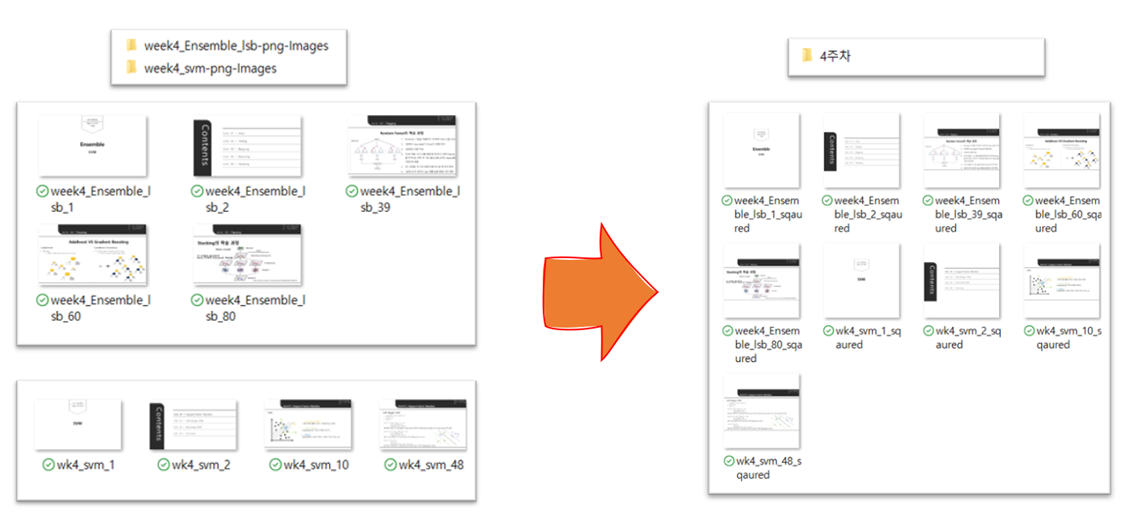